In [6]:
!pip install requests
!pip install beautifulsoup4

In [5]:
from bs4 import BeautifulSoup
import requests

In [6]:
url = "https://www.airlinequality.com/airline-reviews/british-airways/page/30/?sortby=post_date%3ADesc&pagesize=100"
response = requests.get(url)

In [7]:
soup = BeautifulSoup(response.content, "html.parser")

In [8]:
reviews = soup.find_all("article", class_="comp comp_reviews-airline querylist position-content")
print(reviews)

[<article class="comp comp_reviews-airline querylist position-content">
<div class="pagination-controls">
<div class="pagination-filter">
<form method="get">
<span class="pagination-label">Filter Reviews by : </span>
<input name="pagesize" type="hidden" value="100">
<select class="page-filter-selector" data-onchange-submit="" name="filterby">
<option selected="" value="">Latest reviews</option>
<option value="cabin:first">First Class</option>
<option value="cabin:business">Business Class</option>
<option value="cabin:p_economy">Premium Economy</option>
<option value="cabin:economy">Economy Class</option>
</select>
</input></form>
</div>
<div class="pagination-size">
<form method="get">
<span class="pagination-label">Show</span>
<input name="sortby" type="hidden" value="post_date:Desc">
<ul class="page-size-selector">
<li>
<input data-onchange-submit="" id="10" name="pagesize" type="radio" value="10">
<label for="10">10</label>
</input></li>
<li>
<input data-onchange-submit="" id="20" n

In [9]:
reviews = soup.find("div", class_="rating-10")
print(reviews.prettify())

<div class="rating-10 rating-large">
 <span itemprop="ratingValue">
  5
 </span>
 /
 <span itemprop="bestRating">
  10
 </span>
</div>



In [10]:
# Initialize rating values to "0"
rating_value = "0"
total_rating = "0"

# Extracting the individual values
try:
    rating_value_element = soup.find("span", itemprop="ratingValue")
    if rating_value_element:
        rating_value = rating_value_element.get_text(strip=True)
except AttributeError:
    pass

try:
    total_rating_element = soup.find("span", itemprop="bestRating")
    if total_rating_element:
        total_rating = total_rating_element.get_text(strip=True)
except AttributeError:
    pass

# Concatenating the values to form the desired string
total_rating_string = f"{rating_value}/{total_rating}"
print("Overall Rating:", total_rating_string)


Overall Rating: 5/10


In [11]:
reviews = soup.find("div", class_="body")
print(reviews.prettify())

<div class="body" id="anchor328014">
 <h2 class="text_header">
  British Airways customer review
 </h2>
 <h3 class="text_sub_header userStatusWrapper">
  <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
   <span itemprop="name">
    Edwin Ng
   </span>
  </span>
  (Singapore)
  <time datetime="2015-07-21" itemprop="datePublished">
   21st July 2015
  </time>
 </h3>
 <div class="tc_mobile">
  <div class="text_content" itemprop="reviewBody">
   Flight was decent. Have to say the seat was rather cramp. I'm 180cm, or 5 foot 9, sat at seat 32F. Inflight entertainment was alright, but do take note to always unplug the headset whenever you get out of your seat. It damages easily if it gets caught on something. I had to change 2 headsets because of that, because being in a aisle seat, you have to get off when someone wants to use the lavatory, thus remember to unplug it if you intend to get up from your seat. Service was alright. I requested for eye shades, and it came

In [12]:
try:
    # Extracting data
    name_of_customer = soup.find("span", itemprop="name").get_text(strip=True)
except AttributeError:
    name_of_customer = "Anonymous"  # Set a default value if the element is not found

# Output
print("Customer Name =", name_of_customer)


Customer Name = Edwin Ng


In [13]:
try:
    # Extracting data
    country_element = soup.find(class_="text_sub_header userStatusWrapper")
    country = country_element.contents[2].strip().replace("(", "").replace(")", "")
except AttributeError:
    country = "Unknown"  # Set a default value if the element is not found

# Output
print("Country =", country)

Country = Singapore


In [14]:
try:
    # Extracting data
    date_of_review = soup.find("time", itemprop="datePublished").get_text(strip=True)
except AttributeError:
    date_of_review = "Unknown"  # Set a default value if the element is not found

# Output
print("Review Date =", date_of_review)

Review Date = 21st July 2015


In [15]:
try:
    # Extracting data
    trip_verified_element = soup.find("div", class_="text_content")
    trip_verified_status = trip_verified_element.find("a", href="https://www.airlinequality.com/verified-reviews/").get_text(strip=True)

    if trip_verified_status == 'Trip Verified':
        trip_verified_status = 'Yes'
    else:
        trip_verified_status = 'No'
except AttributeError:
    trip_verified_status = 'Unknown'  # Set a default value if the element is not found

# Output
print("Trip Verified Status =", trip_verified_status)

Trip Verified Status = Unknown


In [19]:
try:
    # Extracting data
    text_content_element = soup.find("div", class_="text_content")
    text_content_element_strong = soup.find("strong", class_="text_content")
    text_content = text_content_element.get_text(strip=True).replace("✅Trip Verified| ", "")
except AttributeError:
    text_content = 'No comment available'  # Set a default value if the element is not found

# Output
print("Comment =", text_content)


Comment = Flight was decent. Have to say the seat was rather cramp. I'm 180cm, or 5 foot 9, sat at seat 32F. Inflight entertainment was alright, but do take note to always unplug the headset whenever you get out of your seat. It damages easily if it gets caught on something. I had to change 2 headsets because of that, because being in a aisle seat, you have to get off when someone wants to use the lavatory, thus remember to unplug it if you intend to get up from your seat. Service was alright. I requested for eye shades, and it came about 1hr later, crew must have forgotten about my request. I didn't pursue it as I thought I could just head to the back galley and request for them after my movie. In terms of food, it was appalling and greasy. Overall, I will not say never again, but given a choice, I'd look out for Singapore Airlines first, then the big 3 Gulf carriers. For the right price I'd do BA again, otherwise, there are better ways to suffer than that cramped seat


In [21]:
try:
    # Extracting data
    aircraft_header = soup.find("td", class_="review-rating-header", text="Aircraft")
    aircraft = aircraft_header.find_next_sibling("td").get_text(strip=True) if aircraft_header else "No Aircraft chosen"
except AttributeError:
    aircraft = "No Aircraft chosen"  # Set a default value if the element is not found

# Output
print("Aircraft =", aircraft)

Aircraft = Boeing 777-300


In [22]:
try:
    # Extracting data
    type_of_traveller = soup.find("td", class_="review-rating-header", text="Type Of Traveller").find_next_sibling("td").get_text(strip=True)
except AttributeError:
    type_of_traveller = "Not Specified"  # Set a default value if the element is not found

# Output
print("Type Of Traveller =", type_of_traveller)

Type Of Traveller = Solo Leisure


In [25]:
try:
    # Extracting data
    seat_type_header = soup.find("td", class_="review-rating-header", text="Seat Type")
    seat_type = seat_type_header.find_next_sibling("td").get_text(strip=True) if seat_type_header else "No Seat Type chosen"
except AttributeError:
    seat_type = "No Seat Type chosen"  # Set a default value if the element is not found

# Output
print("Seat Type =", seat_type)

Seat Type = Economy Class


In [27]:
try:
    # Extracting data
    route_header = soup.find("td", class_="review-rating-header", text="Route")
    route = route_header.find_next_sibling("td").get_text(strip=True) if route_header else "No Route specified"
except AttributeError:
    route = "No Route specified"  # Set a default value if the element is not found

# Output
print("Route =", route)

Route = London to Singapire


In [29]:
try:
    # Extracting data
    date_flown_header = soup.find("td", class_="review-rating-header", text="Date Flown")
    date_flown = date_flown_header.find_next_sibling("td").get_text(strip=True) if date_flown_header else "No Date Flown specified"
except AttributeError:
    date_flown = "No Date Flown specified"  # Set a default value if the element is not found

# Output
print("Date Flown =", date_flown)

Date Flown = July 2015


In [31]:
try:
    # Extracting data
    seat_comfort_header = soup.find("td", class_="review-rating-header", text="Seat Comfort")
    seat_comfort_element = seat_comfort_header.find_next_sibling("td").find("span", class_="star fill") if seat_comfort_header else None
    total_seat_comfort = 5  # Total rating for seat comfort is 5
    
    if seat_comfort_element:
        seat_comfort = seat_comfort_element.get_text(strip=True) + " / " + str(total_seat_comfort)
    else:
        seat_comfort = "0 / " + str(total_seat_comfort)  # Set 0 stars if no seat comfort rating is found
except AttributeError:
    seat_comfort = "0 / " + str(total_seat_comfort)  # Set 0 stars if elements are not found

# Output
print("Seat Comfort =", seat_comfort)

Seat Comfort = 1 / 5


In [32]:
# Extracting data
cabin_staff_service_element = soup.find("td", class_="review-rating-header", text="Cabin Staff Service").find_next_sibling("td").find_all("span", class_="star fill")
total_cabin_staff_service = 5  # total rating for cabin staff service is 5
cabin_staff_service = len(cabin_staff_service_element)

# Output
print("Cabin Staff Service =", cabin_staff_service, "/", total_cabin_staff_service)

Cabin Staff Service = 3 / 5


In [34]:
try:
    # Extracting data
    food_and_beverages_header = soup.find("td", class_="review-rating-header", text="Food & Beverages")
    food_and_beverages_elements = food_and_beverages_header.find_next_sibling("td").find_all("span", class_="star fill") if food_and_beverages_header else None
    total_food_and_beverages = 5  # Total rating for food and beverages is 5

    if food_and_beverages_elements:
        food_and_beverages = len(food_and_beverages_elements)
    else:
        food_and_beverages = 0  # Set 0 rating if no food and beverages rating is found
except AttributeError:
    food_and_beverages = 0  # Set 0 rating if elements are not found

# Output
print("Food & Beverages =", food_and_beverages, "/", total_food_and_beverages)


Food & Beverages = 3 / 5


In [35]:
try:
    # Extracting data
    ground_service_header = soup.find("td", class_="review-rating-header", text="Ground Service")
    ground_service_elements = ground_service_header.find_next_sibling("td").find_all("span", class_="star fill") if ground_service_header else None
    total_ground_service = 5  # Total rating for ground service is 5

    if ground_service_elements:
        ground_service = len(ground_service_elements)
    else:
        ground_service = 0  # Set 0 rating if no ground service rating is found
except AttributeError:
    ground_service = 0  # Set 0 rating if elements are not found

# Output
print("Ground Service =", ground_service, "/", total_ground_service)


Ground Service = 4 / 5


In [37]:
try:
    # Extracting data
    wifi_and_connectivity_header = soup.find("td", class_="review-rating-header", text="Wifi & Connectivity")
    wifi_and_connectivity_elements = wifi_and_connectivity_header.find_next_sibling("td").find_all("span", class_="star fill") if wifi_and_connectivity_header else None
    total_wifi_and_connectivity = 5  # Total rating for wifi and connectivity is 5

    if wifi_and_connectivity_elements:
        wifi_and_connectivity = len(wifi_and_connectivity_elements)
    else:
        wifi_and_connectivity = 0  # Set 0 rating if no wifi and connectivity rating is found
except AttributeError:
    wifi_and_connectivity = 0  # Set 0 rating if elements are not found

# Output
print("Wifi & Connectivity =", wifi_and_connectivity, "/", total_wifi_and_connectivity)


Wifi & Connectivity = 5 / 5


In [39]:
try:
    # Extracting data
    value_for_money_header = soup.find("td", class_="review-rating-header", text="Value For Money")
    value_for_money_elements = value_for_money_header.find_next_sibling("td").find_all("span", class_="star fill") if value_for_money_header else None
    total_value_for_money = 5  # Total rating for value for money is 5

    if value_for_money_elements:
        value_for_money = len(value_for_money_elements)
    else:
        value_for_money = 0  # Set 0 rating if no value for money rating is found
except AttributeError:
    value_for_money = 0  # Set 0 rating if elements are not found

# Output
print("Value For Money =", value_for_money, "/", total_value_for_money)


Value For Money = 4 / 5


In [40]:
try:
    # Extracting data
    recommended_element = soup.find("td", class_="review-rating-header", text="Recommended")
    recommended = recommended_element.find_next_sibling("td").get_text(strip=True) if recommended_element else 'No'
except AttributeError:
    recommended = 'No'

# Output
print("Recommended =", recommended)


Recommended = no


In [1]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import math
import pandas as pd
import re

# Define the base URL
base_url = "https://www.airlinequality.com/airline-reviews/british-airways/page/"

# Define the desired page size
page_size = 10

# Initialize an empty list to store all the data
all_data = []

# Send a GET request to the base URL to get the first page
response = requests.get(base_url + "1/?sortby=post_date%3ADesc&pagesize=" + str(page_size))
soup = BeautifulSoup(response.content, "html.parser")

# Find the total number of reviews
pagination_total = soup.find("div", class_="pagination-total").text.strip()
total_reviews = int(re.search(r'(\d+) Reviews', pagination_total).group(1))

# Calculate the total number of pages based on the desired page size
total_pages = math.ceil(total_reviews / page_size)

# Loop through each page
for page_num in range(1, total_pages + 1):
    page_url = f"{base_url}{page_num}/?sortby=post_date%3ADesc&pagesize={page_size}"
    response = requests.get(page_url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Extracting data from each review on the page
    for review in soup.find_all("article", class_="comp comp_reviews-airline querylist position-content"):
        data = {}

        # Extracting data for each topic

        # Customer Name
        try:
            name_of_customer = review.find("span", itemprop="name").get_text(strip=True)
        except AttributeError:
            name_of_customer = "No Customer Name"

        # Country
        try:
            country_element = review.find(class_="text_sub_header userStatusWrapper")
            country = country_element.contents[2].strip().replace("(", "").replace(")", "")
        except AttributeError:
            country = "No Country"

        # Review Date
        try:
            date_of_review = review.find("time", itemprop="datePublished").get_text(strip=True)
        except AttributeError:
            date_of_review = "No Review Date"

        # Trip Verified Status
        try:
            trip_verified_element = review.find("div", class_="text_content")
            trip_verified_status = trip_verified_element.find("a", href="https://www.airlinequality.com/verified-reviews/").get_text(strip=True)
            trip_verified_status = 'Yes' if trip_verified_status == 'Trip Verified' else 'No'
        except AttributeError:
            trip_verified_status = "No Trip Verified Status"

        # Comment
        try:
            text_content_element = review.find("div", class_="text_content")
            text_content_element_strong = review.find("strong", class_="text_content")
            text_content = text_content_element.get_text(strip=True).replace("✅Trip Verified| ", "")
        except AttributeError:
            text_content = "No Comment"

        # Aircraft
        try:
            aircraft_header = review.find("td", class_="review-rating-header", text="Aircraft")
            aircraft = aircraft_header.find_next_sibling("td").get_text(strip=True) if aircraft_header else "No Aircraft chosen"
        except AttributeError:
            aircraft = "No Aircraft"

        # Type Of Traveller
        try:
            type_of_traveller = review.find("td", class_="review-rating-header", text="Type Of Traveller").find_next_sibling("td").get_text(strip=True)
        except AttributeError:
            type_of_traveller = "No Type Of Traveller"

        # Seat Type
        try:
            seat_type = review.find("td", class_="review-rating-header", text="Seat Type").find_next_sibling("td").get_text(strip=True)
        except AttributeError:
            seat_type = "No Seat Type"

        # Route
        try:
            route = review.find("td", class_="review-rating-header", text="Route").find_next_sibling("td").get_text(strip=True)
        except AttributeError:
            route = "No Route"

        # Date Flown
        try:
            date_flown = review.find("td", class_="review-rating-header", text="Date Flown").find_next_sibling("td").get_text(strip=True)
        except AttributeError:
            date_flown = "No Date Flown"

        # Seat Comfort
        try:
            seat_comfort_element = review.find("td", class_="review-rating-header", text="Seat Comfort").find_next_sibling("td").find("span", class_="star fill")
            total_seat_comfort = 5  # total rating for seat comfort is 5
            seat_comfort = seat_comfort_element.get_text(strip=True) if seat_comfort_element else "0"
        except AttributeError:
            seat_comfort = "0"

        # Cabin Staff Service
        try:
            cabin_staff_service_elements = review.find("td", class_="review-rating-header", text="Cabin Staff Service").find_next_sibling("td").find_all("span", class_="star fill")
            total_cabin_staff_service = 5  # total rating for cabin staff service is 5
            cabin_staff_service = len(cabin_staff_service_elements)
        except AttributeError:
            cabin_staff_service = "0"

        # Food & Beverages
        try:
            food_and_beverages_elements = review.find("td", class_="review-rating-header", text="Food & Beverages").find_next_sibling("td").find_all("span", class_="star fill")
            total_food_and_beverages = 5  # total rating for food and beverages is 5
            food_and_beverages = len(food_and_beverages_elements)
        except AttributeError:
            food_and_beverages = "0"

        # Ground Service
        try:
            ground_service_elements = review.find("td", class_="review-rating-header", text="Ground Service").find_next_sibling("td").find_all("span", class_="star fill")
            total_ground_service = 5  # total rating for ground service is 5
            ground_service = len(ground_service_elements)
        except AttributeError:
            ground_service = "0"

        # Wifi & Connectivity
        try:
            wifi_and_connectivity_elements = review.find("td", class_="review-rating-header", text="Wifi & Connectivity").find_next_sibling("td").find_all("span", class_="star fill")
            total_wifi_and_connectivity = 5  # total rating for wifi and connectivity is 5
            wifi_and_connectivity = len(wifi_and_connectivity_elements)
        except AttributeError:
            wifi_and_connectivity = "0"

        # Value For Money
        try:
            value_for_money_elements = review.find("td", class_="review-rating-header", text="Value For Money").find_next_sibling("td").find_all("span", class_="star fill")
            total_value_for_money = 5  # total rating for value for money is 5
            value_for_money = len(value_for_money_elements)
        except AttributeError:
            value_for_money = "0"

        # Recommended
        try:
            recommended = review.find("td", class_="review-rating-header", text="Recommended").find_next_sibling("td").get_text(strip=True)
        except AttributeError:
            recommended = "No Recommendation"

        # Add the data to the list
        data = {
            "Name of Customer": name_of_customer,
            "Country": country,
            "Review Date": date_of_review,
            "Trip Verified": trip_verified_status,
            "Comment": text_content,
            "Aircraft": aircraft,
            "Type Of Traveller": type_of_traveller,
            "Seat Type": seat_type,
            "Route": route,
            "Date Flown": date_flown,
            "Seat Comfort": seat_comfort,
            "Cabin Staff Service": cabin_staff_service,
            "Food & Beverages": food_and_beverages,
            "Ground Service": ground_service,
            "Wifi & Connectivity": wifi_and_connectivity,
            "Value For Money": value_for_money,
            "Recommended": recommended
        }
        all_data.append(data)

# Define the CSV file path
csv_file_path = "british_airways_reviews.csv"

# Write the data to a CSV file
with open(csv_file_path, "w", newline="", encoding="utf-8") as csv_file:
    fieldnames = ["Name of Customer", "Country", "Review Date", "Trip Verified", "Comment", "Aircraft", "Type Of Traveller", "Seat Type", "Route", "Date Flown", "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Wifi & Connectivity", "Value For Money", "Recommended"]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(all_data)

# Count the number of rows written to the CSV
num_rows_written = len(all_data)
print(f"{num_rows_written} rows have been written to {csv_file_path}")

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

376 rows have been written to british_airways_reviews.csv
First 5 rows of the DataFrame:
  Name of Customer         Country         Review Date Trip Verified  \
0       Caleb Lowe  United Kingdom  21st February 2024           Yes   
1     Clarke Roper  United Kingdom   29th January 2024           Yes   
2   Muhammad Yasin  United Kingdom   12th January 2024            No   
3        V Simpson   United States  23rd December 2023           Yes   
4         H Miller  United Kingdom  12th December 2023           Yes   

                                             Comment        Aircraft  \
0   Have no fear when your BA flight is operated ...            A320   
1   I like the British Airways World Traveller Pl...  Boeing 777-200   
2  Not Verified| Overall journey wasn’t bad howev...       A350-1000   
3  Absolutely pathetic business class product. BA...      Boeing 777   
4  Once again a terrible business class experienc...            A380   

  Type Of Traveller        Seat Type         

In [2]:
print(df)

      Name of Customer         Country         Review Date  \
0           Caleb Lowe  United Kingdom  21st February 2024   
1         Clarke Roper  United Kingdom   29th January 2024   
2       Muhammad Yasin  United Kingdom   12th January 2024   
3            V Simpson   United States  23rd December 2023   
4             H Miller  United Kingdom  12th December 2023   
..                 ...             ...                 ...   
371    David Worcester  United Kingdom       15th May 2014   
372             L Matt  United Kingdom       11th May 2014   
373         Alan Clare  United Kingdom        7th May 2014   
374  Michael Dielissen          Canada    29th August 2012   
375      Avril Barclay  United Kingdom   12th October 2011   

               Trip Verified  \
0                        Yes   
1                        Yes   
2                         No   
3                        Yes   
4                        Yes   
..                       ...   
371  No Trip Verified Status   

In [5]:
print(df['Comment'])

0       Have no fear when your BA flight is operated ...
1       I like the British Airways World Traveller Pl...
2      Not Verified| Overall journey wasn’t bad howev...
3      Absolutely pathetic business class product. BA...
4      Once again a terrible business class experienc...
                             ...                        
371    LCY-SNN-JFK-LCY BA001 and 004. Quick check in ...
372    LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
373    6 May 2014: Las Vegas to Gatwick. Boeing 777. ...
374    YYZ to LHR - July 2012 - I flew overnight in p...
375    My son who had worked for British Airways urge...
Name: Comment, Length: 376, dtype: object


In [10]:
# Replace "Not Verified |" or "Verified Review |" with an empty string
df['Comment'] = df['Comment'].str.replace('Not Verified |', '', regex=True)
df['Comment'] = df['Comment'].str.replace('Verified Review |', '', regex=True)

# Print the updated DataFrame
print(df['Comment'])

0       Have no fear when your BA flight is operated ...
1       I like the British Airways World Traveller Pl...
2      | Overall journey wasn’t bad however at the en...
3      Absolutely pathetic business class product. BA...
4      Once again a terrible business class experienc...
                             ...                        
371    LCY-SNN-JFK-LCY BA001 and 004. Quick check in ...
372    LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....
373    6 May 2014: Las Vegas to Gatwick. Boeing 777. ...
374    YYZ to LHR - July 2012 - I flew overnight in p...
375    My son who had worked for British Airways urge...
Name: Comment, Length: 376, dtype: object


In [11]:
# Print all column names in the DataFrame
print(df.columns.tolist())

['Name of Customer', 'Country', 'Review Date', 'Trip Verified', 'Comment', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money', 'Recommended']


In [12]:
pip install textblob

  Attempting uninstall: regex
    Found existing installation: regex 2021.4.4
    Uninstalling regex-2021.4.4:
      Successfully uninstalled regex-2021.4.4
  Attempting uninstall: nltk
    Found existing installation: nltk 3.6.1
    Uninstalling nltk-3.6.1:
      Successfully uninstalled nltk-3.6.1
Note: you may need to restart the kernel to use updated packages.


In [13]:
from textblob import TextBlob

# Assuming your DataFrame is named df
comments = df['Comment']

# Perform sentiment analysis on each comment
sentiments = []
for comment in comments:
    analysis = TextBlob(comment)
    sentiment = analysis.sentiment.polarity
    sentiments.append(sentiment)

# Add sentiment scores to the DataFrame
df['Comment Sentiment'] = sentiments

# Display the DataFrame with the sentiment scores
print(df[['Comment', 'Comment Sentiment']])

                                               Comment  Comment Sentiment
0     Have no fear when your BA flight is operated ...           0.550000
1     I like the British Airways World Traveller Pl...           0.157955
2    | Overall journey wasn’t bad however at the en...          -0.078125
3    Absolutely pathetic business class product. BA...          -0.032042
4    Once again a terrible business class experienc...          -0.128462
..                                                 ...                ...
371  LCY-SNN-JFK-LCY BA001 and 004. Quick check in ...           0.321250
372  LHR-FRA-LCY May 2014. LHR-FRA on a 767 row 18....           0.009673
373  6 May 2014: Las Vegas to Gatwick. Boeing 777. ...           0.083117
374  YYZ to LHR - July 2012 - I flew overnight in p...           0.281818
375  My son who had worked for British Airways urge...           0.143148

[376 rows x 2 columns]


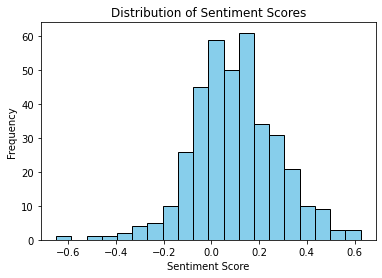

In [25]:
import matplotlib.pyplot as plt

# Plot histogram of sentiment scores
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')

# Show plot
plt.show()

In [26]:
print(df.head(10))

      Name of Customer         Country         Review Date Trip Verified  \
0           Caleb Lowe  United Kingdom  21st February 2024           Yes   
1         Clarke Roper  United Kingdom   29th January 2024           Yes   
2       Muhammad Yasin  United Kingdom   12th January 2024            No   
3            V Simpson   United States  23rd December 2023           Yes   
4             H Miller  United Kingdom  12th December 2023           Yes   
5         Bert Vissers     Switzerland  26th November 2023           Yes   
6       Massimo Tricca           Italy   5th November 2023            No   
7       Mehmet Sahiner  United Kingdom   21st October 2023           Yes   
8  Glenn Taylor-Biffen  United Kingdom   11th October 2023           Yes   
9  Tatiana Bobrovskaya  United Kingdom    2nd October 2023           Yes   

                                             Comment        Aircraft  \
0   Have no fear when your BA flight is operated ...            A320   
1   I like the Brit

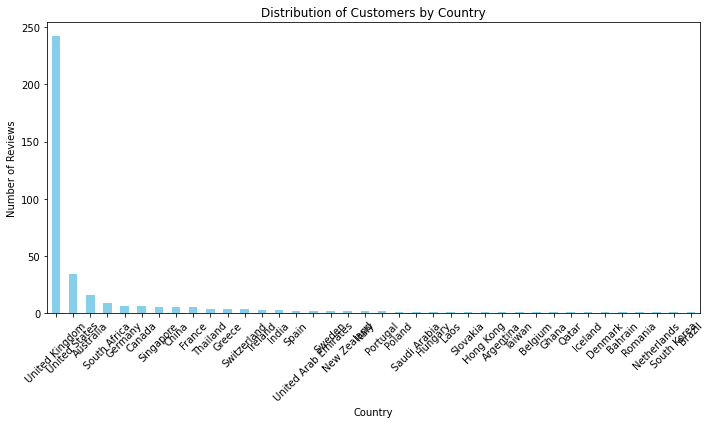

In [27]:
import matplotlib.pyplot as plt

# Count the number of reviews by country
country_counts = df['Country'].value_counts()

# Plot the distribution of customers by country
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

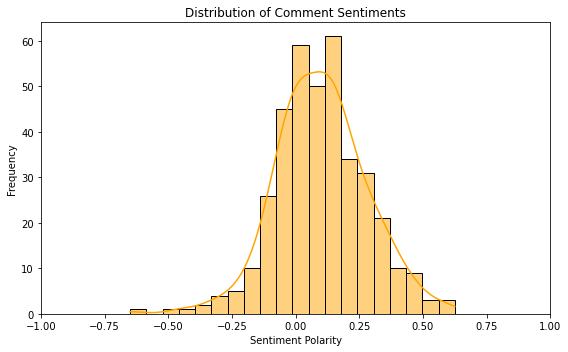

In [31]:
import seaborn as sns

# Plot the distribution of comment sentiments
plt.figure(figsize=(8, 5))  # Set the figure size
sns.histplot(df['Comment Sentiment'], bins=20, kde=True, color='orange')  # Create a histogram
plt.title('Distribution of Comment Sentiments')  # Set the title of the plot
plt.xlabel('Sentiment Polarity')  # Set the label for the x-axis
plt.ylabel('Frequency')  # Set the label for the y-axis
plt.xlim(-1, 1)  # Set the x-axis limits to focus on the sentiment polarity range
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()  # Show the plot


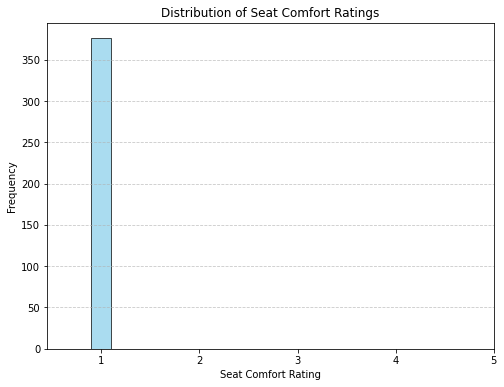

In [32]:
# Plotting the distribution of Seat Comfort ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Seat Comfort'], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Seat Comfort Ratings')
plt.xlabel('Seat Comfort Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

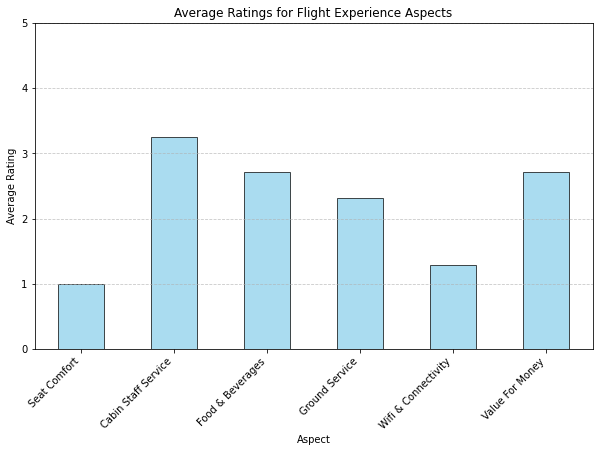

In [33]:
# Calculate average ratings for each aspect
average_ratings = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']].mean()

# Plotting the average ratings
plt.figure(figsize=(10, 6))
average_ratings.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Ratings for Flight Experience Aspects')
plt.xlabel('Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


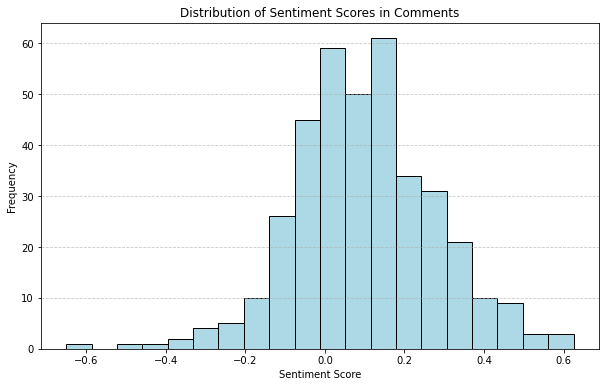

In [34]:
# Plotting the distribution of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(df['Comment Sentiment'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores in Comments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

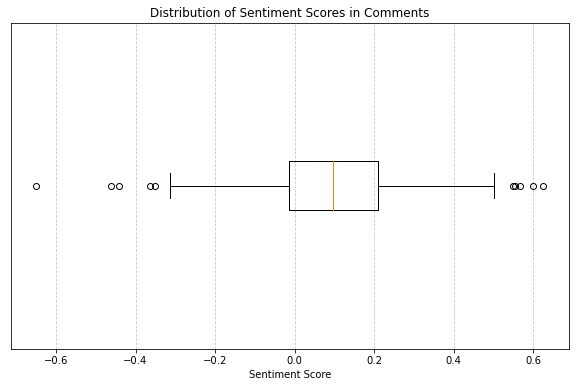

In [35]:
# Plotting the box plot of sentiment scores
plt.figure(figsize=(10, 6))
plt.boxplot(df['Comment Sentiment'], vert=False)
plt.title('Distribution of Sentiment Scores in Comments')
plt.xlabel('Sentiment Score')
plt.yticks([])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


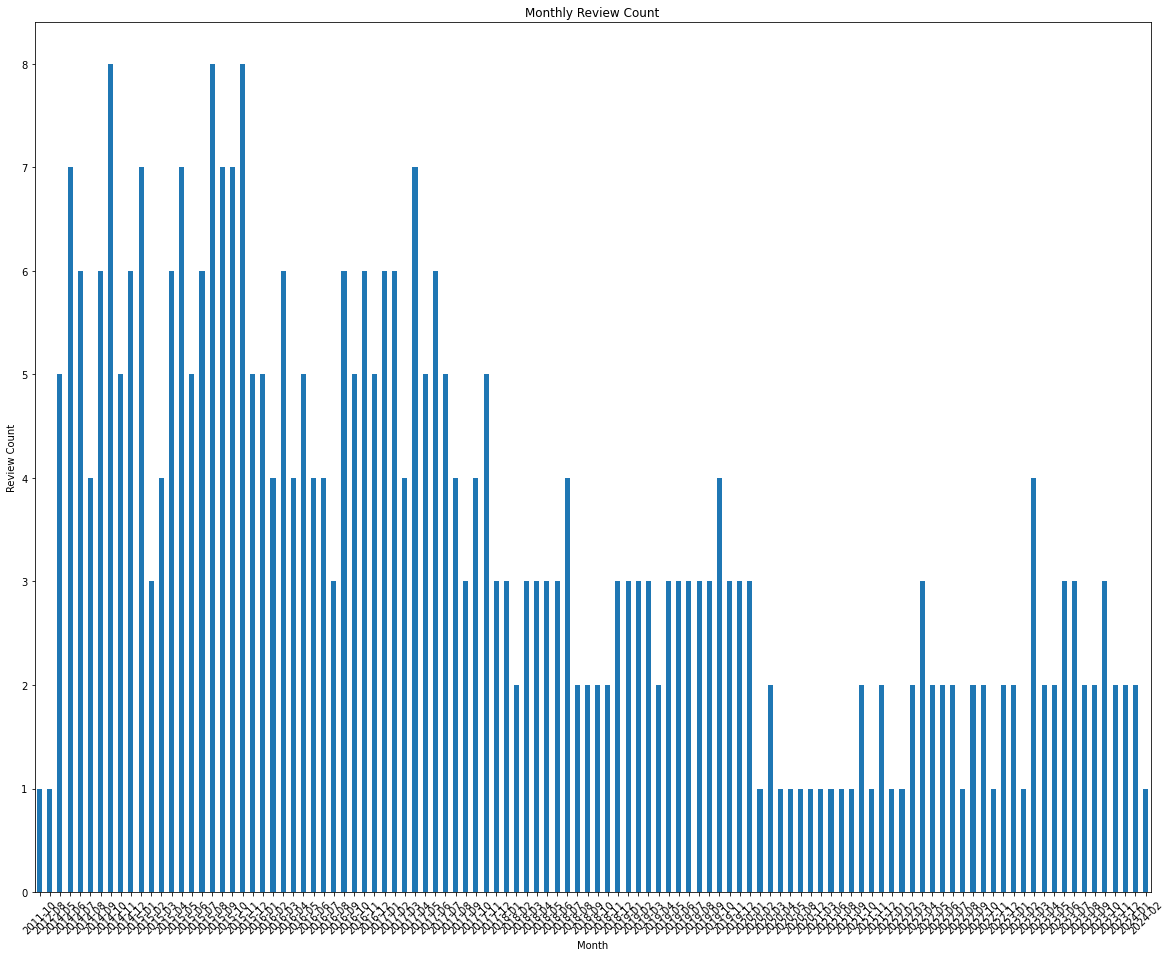

In [57]:
# Convert 'Review Date' column to datetime format
df['Review Date'] = pd.to_datetime(df['Review Date'])

# Plot review count over time
plt.figure(figsize=(20,16))
df['Review Date'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
plt.title('Monthly Review Count')
plt.xlabel('Month')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()


In [58]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


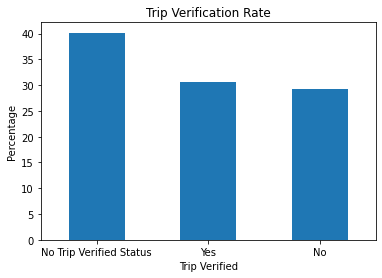

In [59]:
# Calculate verification rate
verification_rate = df['Trip Verified'].value_counts(normalize=True) * 100

# Plot verification rate
plt.figure(figsize=(6, 4))
verification_rate.plot(kind='bar')
plt.title('Trip Verification Rate')
plt.xlabel('Trip Verified')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


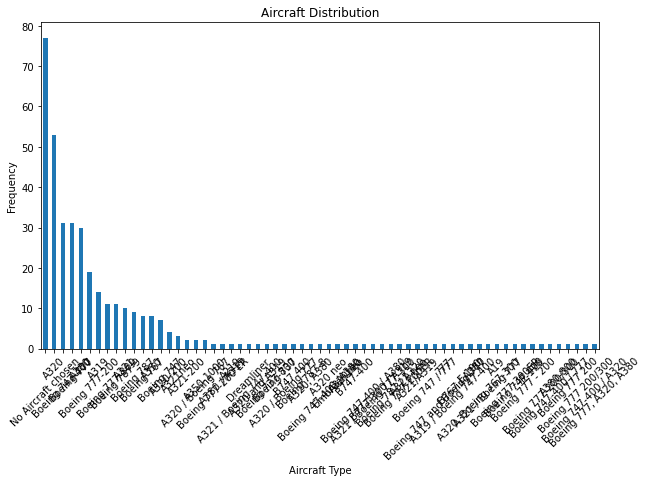

In [60]:
# Plot aircraft distribution
plt.figure(figsize=(10, 6))
df['Aircraft'].value_counts().plot(kind='bar')
plt.title('Aircraft Distribution')
plt.xlabel('Aircraft Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


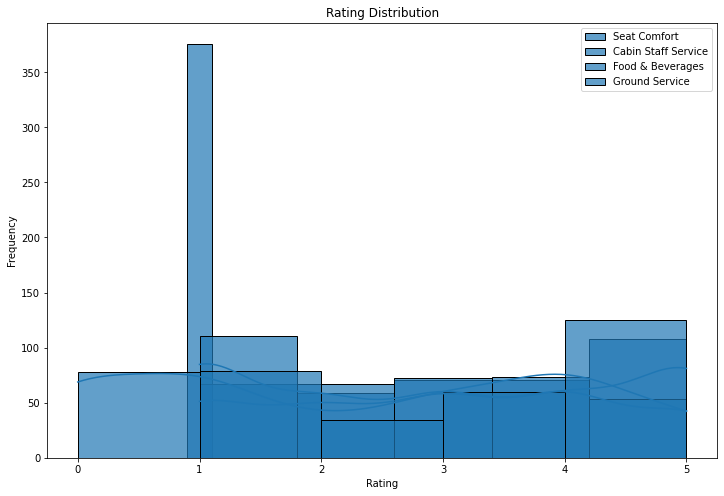

In [61]:
# Plot distribution of seat comfort, cabin staff service, etc.
ratings_cols = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']
plt.figure(figsize=(12, 8))
for col in ratings_cols:
    sns.histplot(df[col], bins=5, kde=True, label=col, alpha=0.7)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()


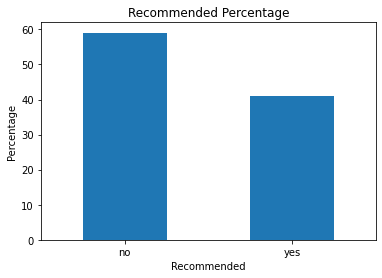

In [63]:
# Calculate recommended percentage
recommended_percentage = df['Recommended'].value_counts(normalize=True) * 100

# Plot recommended percentage
plt.figure(figsize=(6, 4))
recommended_percentage.plot(kind='bar')
plt.title('Recommended Percentage')
plt.xlabel('Recommended')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()


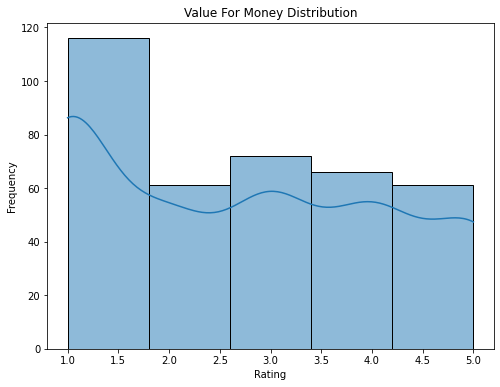

In [64]:
# Plot distribution of value for money ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Value For Money'], bins=5, kde=True)
plt.title('Value For Money Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


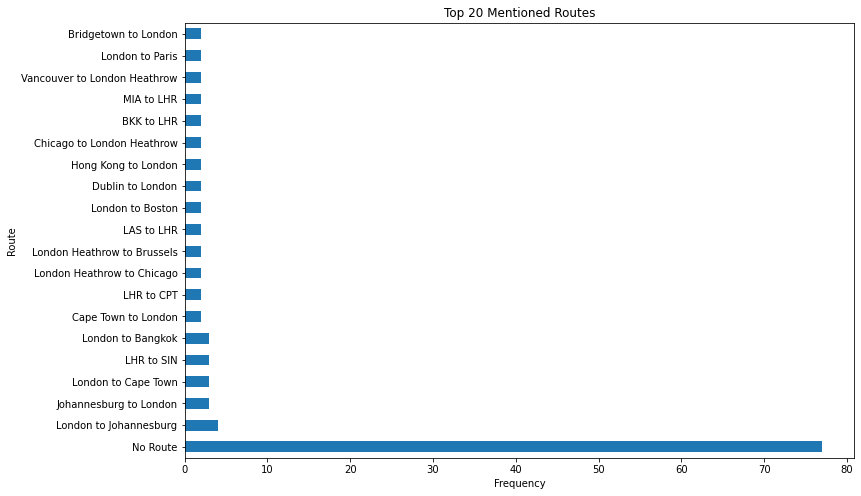

In [65]:
# Plot route frequency
plt.figure(figsize=(12, 8))
df['Route'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Mentioned Routes')
plt.xlabel('Frequency')
plt.ylabel('Route')
plt.show()


In [67]:
# 1. Review Date Distribution
review_date_distribution = df['Review Date'].value_counts().sort_index()

# 2. Trip Verification Rate
trip_verification_rate = df['Trip Verified'].value_counts(normalize=True) * 100

# 3. Aircraft Distribution
aircraft_distribution = df['Aircraft'].value_counts()

# 4. Service Ratings
service_ratings = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service']]

# 5. Sentiment Analysis
sentiment_scores = df['Comment Sentiment']

# 6. Recommended Percentage
recommended_percentage = df['Recommended'].value_counts(normalize=True) * 100

# 7. Value For Money Ratings
value_for_money_ratings = df['Value For Money']

# 8. Top Mentioned Routes
top_routes = df['Route'].value_counts().head(20)

# Display the final data
print("1. Review Date Distribution:")
print(review_date_distribution)

print("\n2. Trip Verification Rate:")
print(trip_verification_rate)

print("\n3. Aircraft Distribution:")
print(aircraft_distribution)

print("\n4. Service Ratings:")
print(service_ratings.describe())

print("\n5. Sentiment Analysis:")
print(sentiment_scores.describe())

print("\n6. Recommended Percentage:")
print(recommended_percentage)

print("\n7. Value For Money Ratings:")
print(value_for_money_ratings.describe())

print("\n8. Top Mentioned Routes:")
print(top_routes)


1. Review Date Distribution:
2011-10-12    1
2012-08-29    1
2014-05-07    1
2014-05-11    1
2014-05-15    1
             ..
2023-12-12    1
2023-12-23    1
2024-01-12    1
2024-01-29    1
2024-02-21    1
Name: Review Date, Length: 371, dtype: int64

2. Trip Verification Rate:
No Trip Verified Status    40.159574
Yes                        30.585106
No                         29.255319
Name: Trip Verified, dtype: float64

3. Aircraft Distribution:
No Aircraft chosen        77
A320                      53
Boeing 747-400            31
Boeing 777                31
A380                      30
                          ..
A380-800                   1
Boeing 777 200             1
Boeing 777 200/300         1
Boeing 747-400 / A320      1
Boeing 777, A320, A380     1
Name: Aircraft, Length: 63, dtype: int64

4. Service Ratings:
       Seat Comfort  Cabin Staff Service  Food & Beverages  Ground Service
count         376.0           376.000000        376.000000      376.000000
mean            1

In [69]:
pip install python-pptx

In [74]:
from pptx import Presentation
from pptx.util import Inches

# Sample data (replace with your actual data)
data = {
    "Trip Verification Rate": {
        "No Trip Verified Status": 40.159574,
        "Yes": 30.585106,
        "No": 29.255319
    },
    "Aircraft Distribution": {
        "No Aircraft chosen": 77,
        "A320": 53,
        "Boeing 747-400": 31,
        "Boeing 777": 31,
        "A380": 30,
    },
    "Service Ratings": {
        "Seat Comfort": {
            "count": 376.0,
            "mean": 1.0,
            "std": 0.0,
            "min": 1.0,
            "25%": 1.0,
            "50%": 1.0,
            "75%": 1.0,
            "max": 1.0
        },
        "Cabin Staff Service": {
            "count": 376.0,
            "mean": 3.250000,
            "std": 1.466515,
            "min": 1.0,
            "25%": 2.0,
            "50%": 3.0,
            "75%": 5.0,
            "max": 5.0
        },
        "Food & Beverages": {
            "count": 376.0,
            "mean": 2.707447,
            "std": 1.427183,
            "min": 1.0,
            "25%": 1.0,
            "50%": 3.0,
            "75%": 4.0,
            "max": 5.0
        },
        "Ground Service": {
            "count": 376.0,
            "mean": 2.311170,
            "std": 1.731738,
            "min": 0.0,
            "25%": 1.0,
            "50%": 2.0,
            "75%": 4.0,
            "max": 5.0
        }
    },
    "Sentiment Analysis": {
        "count": 376.0,
        "mean": 0.099855,
        "std": 0.180514,
        "min": -0.650000,
        "25%": -0.013217,
        "50%": 0.096949,
        "75%": 0.210429,
        "max": 0.625000
    },
    "Recommended Percentage": {
        "no": 59.042553,
        "yes": 40.957447
    },
    "Value For Money Ratings": {
        "count": 376.0,
        "mean": 2.720745,
        "std": 1.465768,
        "min": 1.0,
        "25%": 1.0,
        "50%": 3.0,
        "75%": 4.0,
        "max": 5.0
    },
    "Top Mentioned Routes": {
        "No Route": 77,
        "London to Johannesburg": 4,
        "Johannesburg to London": 3,
        "London to Cape Town": 3,
        "LHR to SIN": 3,
        "London to Bangkok": 3,
        "Cape Town to London": 2,
        "LHR to CPT": 2,
        "London Heathrow to Chicago": 2,
        "London Heathrow to Brussels": 2,
        "LAS to LHR": 2,
        "London to Boston": 2,
        "Dublin to London": 2,
        "Hong Kong to London": 2,
        "Chicago to London Heathrow": 2,
        "BKK to LHR": 2,
        "MIA to LHR": 2,
        "Vancouver to London Heathrow": 2,
        "London to Paris": 2,
        "Bridgetown to London": 2,
    }
}

# Create a PowerPoint presentation
prs = Presentation()

# Add a slide
slide = prs.slides.add_slide(prs.slide_layouts[5])

# Define table data
table_data = []
for category, subcategories in data.items():
    for subcategory, value in subcategories.items():
        table_data.append([category, subcategory, value])

# Add a table to the slide
rows = len(table_data) + 1  # Add 1 for header row
cols = 3  # Number of columns
left = Inches(1)
top = Inches(1)
width = Inches(8)
height = Inches(1.5)
table = slide.shapes.add_table(rows, cols, left, top, width, height).table

# Define table header
table.cell(0, 0).text = "Category"
table.cell(0, 1).text = "Subcategory"
table.cell(0, 2).text = "Value"

# Populate table with data
for i, (category, subcategory, value) in enumerate(table_data):
    table.cell(i + 1, 0).text = category
    table.cell(i + 1, 1).text = subcategory
    table.cell(i + 1, 2).text = str(value)

# Save the presentation
prs.save("data_summary.pptx")

In [75]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    "Trip Verification Rate": {
        "No Trip Verified Status": 40.159574,
        "Yes": 30.585106,
        "No": 29.255319
    },
    "Recommended Percentage": {
        "no": 59.042553,
        "yes": 40.957447
    }
}

# Create a PowerPoint presentation
prs = Presentation()

# Add a slide
slide = prs.slides.add_slide(prs.slide_layouts[5])

# Add title to the slide
title = slide.shapes.title
title.text = "Key Metrics and Visualizations"

# Add visualizations and metrics
left = Inches(0.5)
top = Inches(1.5)

# Plot Trip Verification Rate
plt.figure(figsize=(4, 3))
plt.bar(data["Trip Verification Rate"].keys(), data["Trip Verification Rate"].values())
plt.xlabel("Trip Verified Status")
plt.ylabel("Percentage")
plt.title("Trip Verification Rate")
plt.savefig("trip_verification_rate.png")
plt.close()

# Add the plot to the slide
slide.shapes.add_picture("trip_verification_rate.png", left, top, width=Inches(3.5))

# Add metrics for Trip Verification Rate
trip_verified_status_metrics = "\n".join([f"{k}: {v}%" for k, v in data["Trip Verification Rate"].items()])
trip_verified_status_text_box = slide.shapes.add_textbox(left=Inches(5), top=Inches(1.5), width=Inches(2), height=Inches(3))
text_frame = trip_verified_status_text_box.text_frame
p = text_frame.add_paragraph()
p.text = "Trip Verification Rate:\n" + trip_verified_status_metrics

# Plot Recommended Percentage
plt.figure(figsize=(4, 3))
plt.bar(data["Recommended Percentage"].keys(), data["Recommended Percentage"].values())
plt.xlabel("Recommended")
plt.ylabel("Percentage")
plt.title("Recommended Percentage")
plt.savefig("recommended_percentage.png")
plt.close()

# Add the plot to the slide
slide.shapes.add_picture("recommended_percentage.png", left=Inches(0.5), top=Inches(3.5), width=Inches(3.5))

# Add metrics for Recommended Percentage
recommended_percentage_metrics = "\n".join([f"{k}: {v}%" for k, v in data["Recommended Percentage"].items()])
recommended_percentage_text_box = slide.shapes.add_textbox(left=Inches(5), top=Inches(4), width=Inches(2), height=Inches(2))
text_frame = recommended_percentage_text_box.text_frame
p = text_frame.add_paragraph()
p.text = "Recommended Percentage:\n" + recommended_percentage_metrics

# Save the presentation
prs.save("analysis_summary.pptx")

In [76]:
from pptx import Presentation
from pptx.util import Inches
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = {
    "Sentiment Analysis": {
        "Positive": 40.159574,
        "Negative": 30.585106,
        "Neutral": 29.255319
    },
    "Recommended Percentage": {
        "no": 59.042553,
        "yes": 40.957447
    }
}

# Create a PowerPoint presentation
prs = Presentation()

# Add a slide
slide = prs.slides.add_slide(prs.slide_layouts[5])

# Add title to the slide
title = slide.shapes.title
title.text = "Key Metrics and Visualizations"

# Add visualizations and metrics
left = Inches(0.5)
top = Inches(1.5)

# Plot Sentiment Analysis
plt.figure(figsize=(4, 3))
plt.bar(data["Sentiment Analysis"].keys(), data["Sentiment Analysis"].values())
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.title("Sentiment Analysis")
plt.savefig("sentiment_analysis.png")
plt.close()

# Add the plot to the slide
slide.shapes.add_picture("sentiment_analysis.png", left, top, width=Inches(3.5))

# Add metrics for Sentiment Analysis
sentiment_analysis_metrics = "\n".join([f"{k}: {v}%" for k, v in data["Sentiment Analysis"].items()])
sentiment_analysis_text_box = slide.shapes.add_textbox(left=Inches(5), top=Inches(1.5), width=Inches(2), height=Inches(3))
text_frame = sentiment_analysis_text_box.text_frame
p = text_frame.add_paragraph()
p.text = "Sentiment Analysis:\n" + sentiment_analysis_metrics

# Plot Recommended Percentage
plt.figure(figsize=(4, 3))
plt.bar(data["Recommended Percentage"].keys(), data["Recommended Percentage"].values())
plt.xlabel("Recommended")
plt.ylabel("Percentage")
plt.title("Recommended Percentage")
plt.savefig("recommended_percentage.png")
plt.close()

# Add the plot to the slide
slide.shapes.add_picture("recommended_percentage.png", left=Inches(0.5), top=Inches(3.5), width=Inches(3.5))

# Add metrics for Recommended Percentage
recommended_percentage_metrics = "\n".join([f"{k}: {v}%" for k, v in data["Recommended Percentage"].items()])
recommended_percentage_text_box = slide.shapes.add_textbox(left=Inches(5), top=Inches(4), width=Inches(2), height=Inches(2))
text_frame = recommended_percentage_text_box.text_frame
p = text_frame.add_paragraph()
p.text = "Recommended Percentage:\n" + recommended_percentage_metrics

# Save the presentation
prs.save("analysis_summary2.pptx")